In [1]:
from yamlscript_corrmatrix import corrmatrix_parser
from plot_classes import *

In [2]:
data = corrmatrix_parser("CorrelationMatrix.yaml")

In [70]:
from plot_classes import EmptyPlot


class PythCMatrix(EmptyPlot):
    
    
    def __init__(self, obj, threshold=0, rcp_kw={}, **kwargs):        
        
        super().__init__(**kwargs)
        self.fill(obj, threshold)
        
        # user can control size or let it be calculated automatically
        if 'size' in kwargs.keys():
            print("***Manually changing the figure size") # need logger
        else:
            self.set_figsize()
        
        self.create_canvas()
        self.make_grid()
        self.ax = self.make_subplot(0, 1, 0, 1)
        self.set_color() # set default colormap
        
        # set default rcParams for the plot
        self.rcp_dict = {"font.size"     : 8, # x, y tick label font size
                         "axes.titlesize": 15 # master title font size
                        }
        
        # update dict if user has passed any rcParam values in the constructor
        self.rcp_dict.update({k: v for k, v in rcp_kw.items() if (k in mpl.rcParams)})
        
        # set parameters
        self.config_rcParams(self.rcp_dict)
        
        
    def set_figsize(self):
        
        # variable figure length based on number of data points
        n = len(self.active_data)
        self.figsize = (n/3, n/3)
        print(self.figsize)
        
    
    def fill(self, obj, threshold):
        
        if isinstance(obj, list):
            self.data_container = obj
        else:
            self.data_container.append(obj)

        self.active_data = self.data_container[0]
        self.active_data = self.cut_data(threshold) # cut original data
        self.list_vals = self.active_data.index.to_list()
    
    
    def cut_data(self, threshold):
        # filter correlation data based on numerical threshold
        
        data = self.active_data
        
        # filter rows
        data = data[abs(data.iloc[0]) >= threshold]
        
        # filter columns based on filtered rows
        data = data.loc[:,[x for x in data.index]]
        
        return data*100

        
    def c_matrix(self, set_cbar, decimal, **kwargs):

        # plot the heatmap
        im = self.ax.imshow(self.active_data, **kwargs, cmap=mpl.cm.get_cmap(self.user_cmap))
        
        # set color limits to -1, 1 (which is the values correlation can take)
        im.set_clim(-100,100)
        
        if set_cbar:
            # create new ax for colorbar
            cax = self.fig.add_axes([self.ax.get_position().x1 + 0.01, self.ax.get_position().y0, 0.03, self.ax.get_position().height])
            cbar = self.fig.colorbar(im, cax=cax)

            # change range of colorbar
            cax.set_yticks(np.arange(-100, 101, 25))
            cax.set_yticklabels(np.arange(-100, 101, 25), fontsize=10)
            
            # reduce tick size of colorbar
            cax.tick_params(axis='y', which='both', length=5)

        # set variable names as axis tick labels
        self.ax.set_xticks(np.arange(len(self.list_vals)), labels=self.list_vals, fontsize=self.rcp_dict["font.size"])
        self.ax.set_yticks(np.arange(len(self.list_vals)), labels=self.list_vals, fontsize=self.rcp_dict["font.size"])
        
        # rotate x axis labels
        plt.setp(self.ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # format entries to one decimal place
        valfmt = mpl.ticker.StrMethodFormatter("{x:.1f}")
        
        # put text in cells
        for i in range(len(self.list_vals)):
            for j in range(len(self.list_vals)):
                self.ax.text(j, i, valfmt(self.active_data.iloc[i][j], None), ha="center", va="center", color="k",
                             size=self.rcp_dict["font.size"])
        
        # reset minor ticks
        self.ax.set_xticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        self.ax.set_yticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        
        # set dotted line internal grid
        self.ax.grid(which="minor", color="k", linestyle='--', linewidth=1)
        
        # remove the axis ticks on every side
        self.ax.tick_params(which="both", bottom=False, left=False, top=False, right=False)
        
        # set master title
        self.fig.suptitle(self.title, fontsize=self.rcp_dict["axes.titlesize"])

        
    def display(self, set_cbar=False, decimal=1, save_name="", dpi=1000):
        
        self.c_matrix(set_cbar, decimal)
        
        if save_name:
            self.saveimage(save_name, dpi)

(8.333333333333334, 8.333333333333334)
font.size 8
axes.titlesize 15


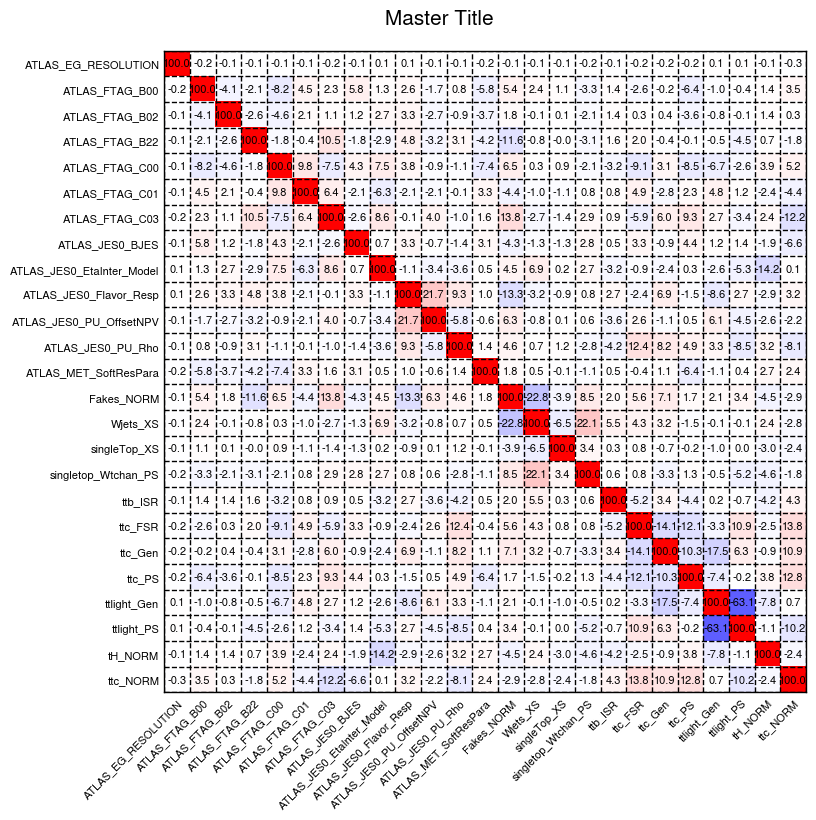

In [73]:
obj = PythCMatrix(data, 0.001, title="Master Title")
obj.set_color(colormap='bwr')
# cmap list: https://matplotlib.org/stable/tutorials/colors/colormaps.html
obj.display(set_cbar=False)
# obj.show_content()